In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\car price pred\cars.csv")

### Data Exploration

In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.shape

(4340, 8)

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [22]:
df.select_dtypes(include = 'int64').columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

### Checking null vals

In [35]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Restructuring df & adding a new column

In [38]:
df.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2982,Hyundai i20 Active 1.2 SX,2016,650000,26000,Petrol,Individual,Manual,First Owner


In [40]:
#dropping name from the dataframe
df = df.drop(columns = 'name')

In [42]:
df.sample()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1391,2018,800000,52000,Diesel,Individual,Manual,First Owner


In [55]:
#adding new column called current year for finding the years of the car
df['current_year']=2024

In [57]:
df['current_age_of_car']  = df['current_year']-df['year']

In [61]:
df.sample()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,current_age_of_car
3816,2014,285000,89126,Diesel,Individual,Manual,First Owner,2024,10


In [65]:
#now removing the year and current year columns
df = df.drop(columns = ['year', 'current_year'])

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_age_of_car
2358,1295000,9000,Diesel,Dealer,Manual,First Owner,5


### Encoding categorical data

In [71]:
df.select_dtypes(include='object').columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [73]:
#seeing how many unique value do we possess in each of the above
df['fuel'].nunique()

5

In [75]:
df['seller_type'].nunique()

3

In [77]:
df['transmission'].nunique()

2

In [79]:
df['owner'].nunique()

5

In [81]:
df = pd.get_dummies(data=df, drop_first =True)

In [83]:
df.sample()

,selling_price,km_driven,current_age_of_car,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3889,61000,90000,24,False,False,False,True,True,False,True,False,True,False,False


In [85]:
df.shape

(4340, 14)

In [87]:
#additional 6 columns after One Hot Encoding

### Now finding correlation

In [90]:
#Using selling price as dependent column
df2=df.drop(columns='selling_price')

Text(0.5, 1.0, 'Correlation with selling price of vehicle')

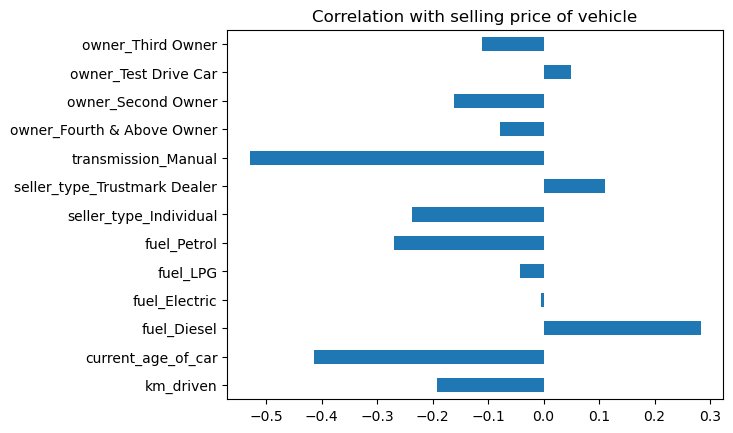

In [98]:
df2.corrwith(df['selling_price']).plot.barh()
plt.title('Correlation with selling price of vehicle')

In [100]:
#we can see only owner_Test Drive car, seller_type_trustmark dealer and fuel_diesel having positive correlations 

Text(0.5, 1.0, 'Correlations')

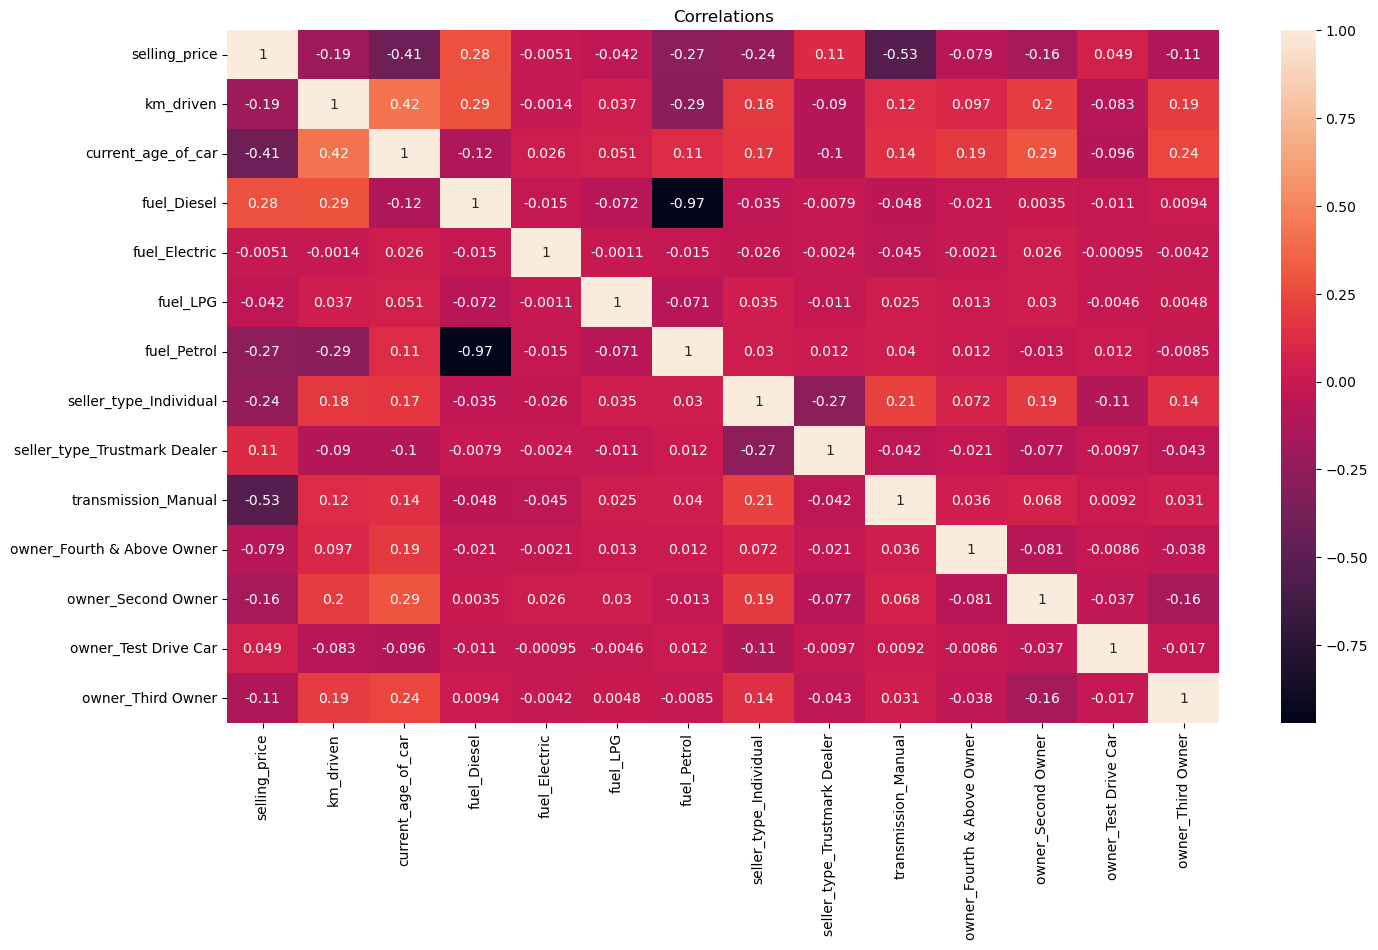

In [118]:
corrx = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corrx, annot = True)
plt.title('Correlations')

### Splitting Variable

In [121]:
#feature matrix
x = df.drop(columns='selling_price')

In [123]:
#target variable will be our selling price
y = df['selling_price']

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2, random_state = 0)

In [127]:
x_train.shape

(3472, 13)

In [131]:
x_test.shape

(868, 13)

In [133]:
y_test.shape

(868,)

In [137]:
y_train.shape


(3472,)

### Building Model

In [140]:
# 1) Multiple Linear regression

In [142]:
from sklearn.linear_model import LinearRegression

In [149]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [151]:
y_prediction = reg.predict(x_test)

In [153]:
#now evaluating performmance

In [159]:
from sklearn.metrics import r2_score

In [167]:
r2_score(y_test, y_prediction)

0.5025071208924412

In [170]:
# 2) Random Forest Regression

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [178]:
y2_prediction = reg_rf.predict(x_test)

In [180]:
r2_score(y_test, y2_prediction)

0.7262332718453055

### Finding optimal parameters using randomized search

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [225]:
parameters = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2,5,10,20,50],
    'max_features': [ 'sqrt', 'log2' , None] 
}

In [227]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'max_features': ['sqrt', 'log2', None]}

In [229]:
random_cv = RandomizedSearchCV(estimator = reg_rf, param_distributions = parameters, n_iter =10,
                               scoring = 'neg_mean_absolute_error', cv=5, verbose =2, n_jobs =-1)

In [231]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [233]:
random_cv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_split=10,
                      n_estimators=1000)

In [237]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'absolute_error'}

### Final Model random foreest

In [242]:
reg= RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_split=10,
                      n_estimators=1000)
reg.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_split=10,
                      n_estimators=1000)

In [248]:
y_prediction = reg.predict(x_test)

In [250]:
r2_score(y_test, y_prediction)

0.7412258463993233